In [3]:
import pandas as pd

In [4]:
wine = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

In [5]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No Null values as it is seen above

In [7]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

The data is in float and int which is easier for the machine.

In [8]:
wine.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [9]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

The Target column 'quality' has categorical data and each category value counts can also be seen

In [10]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Standard Deviation for 'total sulfur dioxide' and 'free sulfur dioxide' seems to be wide. 

'residual sugar' has unsual maximum value.

Outliers may exist.

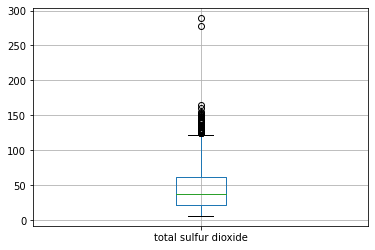

In [11]:
wine.boxplot(['total sulfur dioxide'])

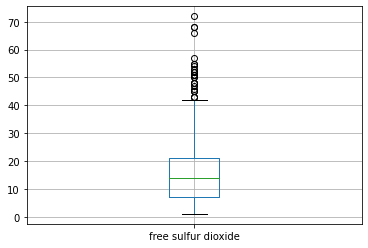

In [12]:
wine.boxplot(['free sulfur dioxide'])

It is clear that there are outliers present.

Let's check the skewness score that it carries long with other coulumns as well

In [13]:
wine.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

'residual sugar'
'chlorides'
'total sulphur dioxide'
'free sulphur dioxide' have skewness.

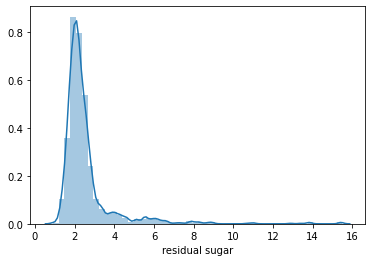

In [14]:
import seaborn as sns

sns.distplot(wine['residual sugar'])

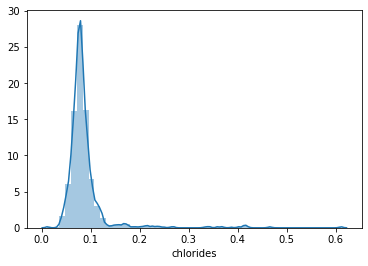

In [15]:
sns.distplot(wine['chlorides'])

The other two of the above mentioned must have same level of skewness.

# Checking Outliers

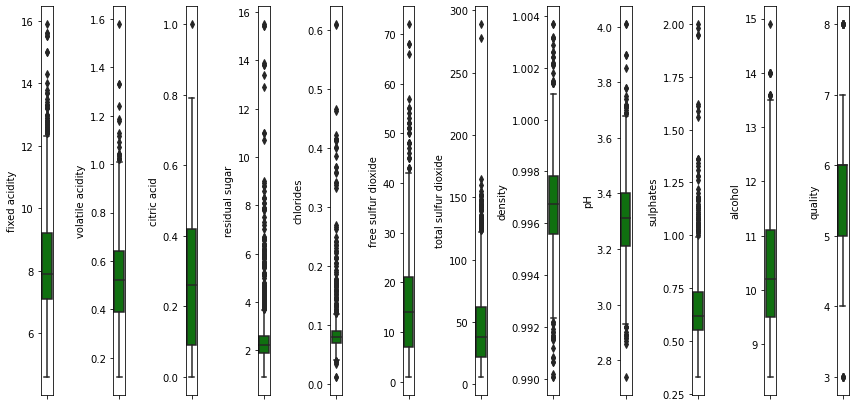

In [16]:
import matplotlib.pyplot as plt

wine_test = wine.columns.values
ncol = 15
nrow = 8
plt.figure(figsize = (ncol, 3*ncol))
for i in range (0, len(wine_test)):
    plt.subplot(nrow, ncol, i+1)
    sns.boxplot(wine[wine_test[i]], color = 'green', orient = 'v')
    plt.tight_layout()

Almost all the columns have the outliers where we'll have to decide whether to keep them or to remove.

In [17]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


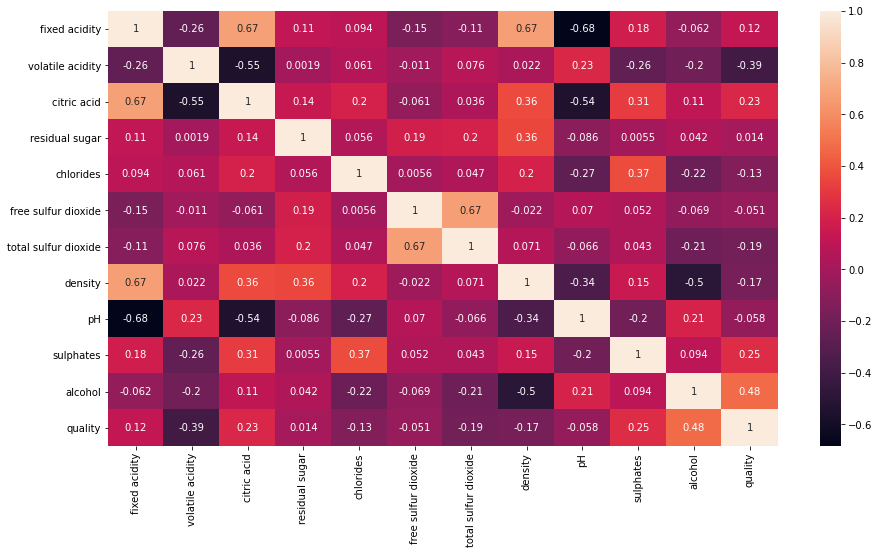

In [18]:
plt.figure(figsize = (15,8))

sns.heatmap(wine.corr(), annot = True)

In [19]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

'volatile acidity' is having highest negative trend with quality.

'alcohol' has highest positive trend with quality.

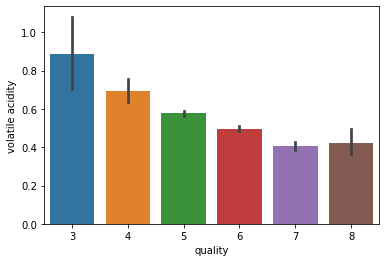

In [20]:
sns.barplot(wine['quality'], wine['volatile acidity'])

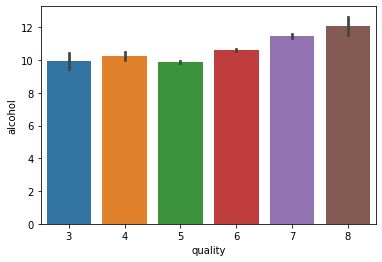

In [21]:
sns.barplot(wine['quality'], wine['alcohol'])

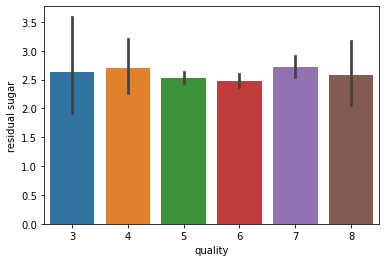

In [22]:
sns.barplot(wine['quality'], wine['residual sugar'])

'residual sugar' has irregular trend as it hardly affects 'quality'.

It can be dropped from the data.

In [23]:
wine1 = wine.drop(['residual sugar'], axis = 1)
wine1

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [24]:
from scipy.stats import zscore
import numpy as np

z = np.abs(zscore(wine1))
z.shape

(1599, 11)

In [25]:
threshold = 3

np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   38,   42,   43,   45,
          57,   81,   81,   83,   86,   88,   91,   92,   95,  106,  106,
         109,  120,  126,  127,  142,  144,  147,  151,  151,  151,  151,
         169,  169,  181,  199,  226,  226,  240,  243,  244,  258,  258,
         281,  291,  339,  340,  347,  354,  374,  381,  391,  396,  400,
         442,  442,  451,  459,  467,  480,  515,  517,  544,  554,  554,
         555,  555,  557,  557,  568,  584,  588,  591,  608,  614,  636,
         639,  649,  651,  652,  652,  672,  672,  684,  690,  690,  692,
         692,  695,  723,  724,  730,  754,  776,  777,  795,  821,  832,
         836,  837,  889,  899,  925,  926,  982, 1017, 1018, 1051, 1051,
        1079, 1081, 1111, 1114, 1131, 1154, 1165, 1175, 1231, 1244, 1244,
        1260, 1269, 1269, 1270, 1270, 1288, 1289, 1295, 1296, 1299, 1299,
        1300, 1312, 1316, 1319, 1319, 1321, 1358, 1367, 1370, 1370, 1372,
        1372, 1374, 1374, 1434, 1434, 

In [26]:
wine_new = wine1[(z<3).all(axis = 1)]
wine_new.shape

(1469, 11)

In [36]:
wine_new

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


# Loss Percentage

In [27]:
loss_percentage = (1599-1469)/1599*100
print(loss_percentage)

8.130081300813007


##### 8.13% is relatively more data loss. Less than 7% is acceptable.

Data loss is not acceptable thus the outliers are retained but atleast the skewness can be removed.

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
wine1['quality']

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

'What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'' 

is given in to perform. thus, the 'y' is made into binary classification.

In [39]:
# Assuming a wine with quality > 6.5 is 'good' [1] & others are 'ordinary' [0]

wine1['quality'] = wine1.quality.apply(lambda x : 1 if x > 6.5 else 0)

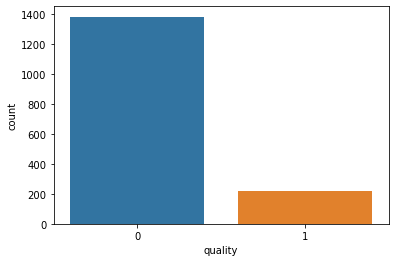

In [40]:
sns.countplot(data = wine1, x = 'quality')
plt.show()

In [41]:
x = wine1.iloc[:,0:-1]

In [42]:
x.shape

(1599, 10)

In [52]:
y = wine1.iloc[:,-1]
y.shape

(1599,)

In [56]:
y = y.values.reshape(-1,1)

In [57]:
y.shape

(1599, 1)

In [45]:
y.unique()

array([0, 1], dtype=int64)

let's settle the skewness for x

In [46]:
from sklearn.preprocessing import power_transform

x = power_transform(x, method = 'yeo-johnson')

In [47]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9
0,-0.442666,0.995542,-1.531109,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
1,-0.161308,1.771299,-1.531109,0.786204,0.993852,0.854954,0.036967,-0.709517,0.395140,-0.500860
2,-0.161308,1.269801,-1.255359,0.560696,0.193450,0.540394,0.142851,-0.310054,0.183772,-0.500860
3,1.522582,-1.550050,1.398471,-0.226113,0.385115,0.693699,0.669354,-0.980154,-0.392318,-0.500860
4,-0.442666,0.995542,-1.531109,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
...,...,...,...,...,...,...,...,...,...,...
1594,-1.461202,0.497996,-0.993315,0.480036,1.397043,0.244351,-0.978746,0.906172,-0.392318,0.292864
1595,-1.767458,0.227895,-0.867068,-1.013159,1.727353,0.457504,-0.860223,1.336627,0.874884,0.888124
1596,-1.364367,0.000387,-0.683294,-0.172896,1.235044,0.107498,-0.527497,0.718869,0.820841,0.734558
1597,-1.767458,0.728553,-0.743826,-0.226113,1.397043,0.244351,-0.672160,1.638595,0.588344,-0.018800


##### I tried to convert the 'y' data into good and bad from internet help but couldn't get it done. 

In [49]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [59]:
lr = LogisticRegression()

for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(accuracy_score(y_train, pred_train)*100,1) == round(accuracy_score(y_test, pred_test)*100,1):
        print('at random state', i, 'The model performs well')
        print('at random state', i)
        print('training socre is:', accuracy_score(y_train, pred_train)*100)
        print('testing score is:', accuracy_score(y_test, pred_test)*100)

at random state 75 The model performs well
at random state 75
training socre is: 88.11571540265832
testing score is: 88.125
at random state 100 The model performs well
at random state 100
training socre is: 88.11571540265832
testing score is: 88.125
at random state 111 The model performs well
at random state 111
training socre is: 88.11571540265832
testing score is: 88.125
at random state 143 The model performs well
at random state 143
training socre is: 88.11571540265832
testing score is: 88.125
at random state 152 The model performs well
at random state 152
training socre is: 88.11571540265832
testing score is: 88.125
at random state 179 The model performs well
at random state 179
training socre is: 88.35027365129007
testing score is: 88.4375
at random state 268 The model performs well
at random state 268
training socre is: 88.11571540265832
testing score is: 88.125
at random state 363 The model performs well
at random state 363
training socre is: 88.35027365129007
testing score is: 

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=863,test_size=0.20)

In [61]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       278
           1       0.11      0.05      0.07        42

    accuracy                           0.82       320
   macro avg       0.49      0.50      0.49       320
weighted avg       0.77      0.82      0.79       320



# cross validation

In [77]:
from sklearn.model_selection import cross_val_score

lss = accuracy_score(y_test, pred_test)

for j in range(2,10):
    cs_score = cross_val_score(lr, x, y, cv=j)
    print('cross validation values:', cs_score)
    print('cross validation score:', cs_score.mean()*100, 'cross validation std:', cs_score.std()*100, '\n')

cross validation values: [0.87875    0.84355444]
cross validation score: 86.11522215269088 cross validation std: 1.7597778473091352 

cross validation values: [0.87242026 0.87617261 0.87992495]
cross validation score: 87.61726078799249 cross validation std: 0.30637770391284236 

cross validation values: [0.865      0.905      0.8575     0.88220551]
cross validation score: 87.74263784461152 cross validation std: 1.8266226891745925 

cross validation values: [0.86875    0.85625    0.88125    0.840625   0.88401254]
cross validation score: 86.61775078369907 cross validation std: 1.6145415124601172 

cross validation values: [0.86516854 0.86142322 0.89138577 0.85714286 0.87969925 0.87969925]
cross validation score: 87.2419813578891 cross validation std: 1.2059430464697778 

cross validation values: [0.86462882 0.86026201 0.86026201 0.90789474 0.80263158 0.90350877
 0.86842105]
cross validation score: 86.68012826826893 cross validation std: 3.217525684488915 

cross validation values: [0.865

Cross validation with cv = 4 gives the score of 87.7426

testing score(accuracy score) of Logistic Regression is: 88.4375
    
Both are almost same thus, it is a good score without any errors.

## AUC ROC curve

<function matplotlib.pyplot.show(*args, **kw)>

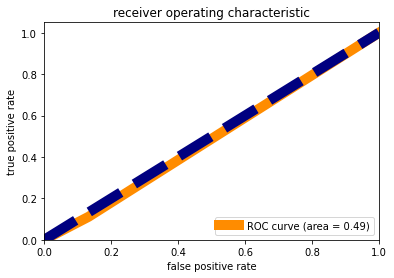

In [71]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, threshold = roc_curve(pred_test, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', lw = 10, label = 'ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1], [0,1], color = 'navy', lw = 10, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show

In [73]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

In [74]:
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
pred = dtr.predict(x_test)
print(accuracy_score(y_test,pred))

0.871875


In [ ]:
DTC model score is 87% same as Logistic Regression.